In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
titanic=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv',usecols=['Pclass','Sex','Age','SibSp','Parch','Fare','Survived'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [6]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
titanic.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
dtype: float64

In [8]:
titanic['Age']=titanic['Age'].mean()
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

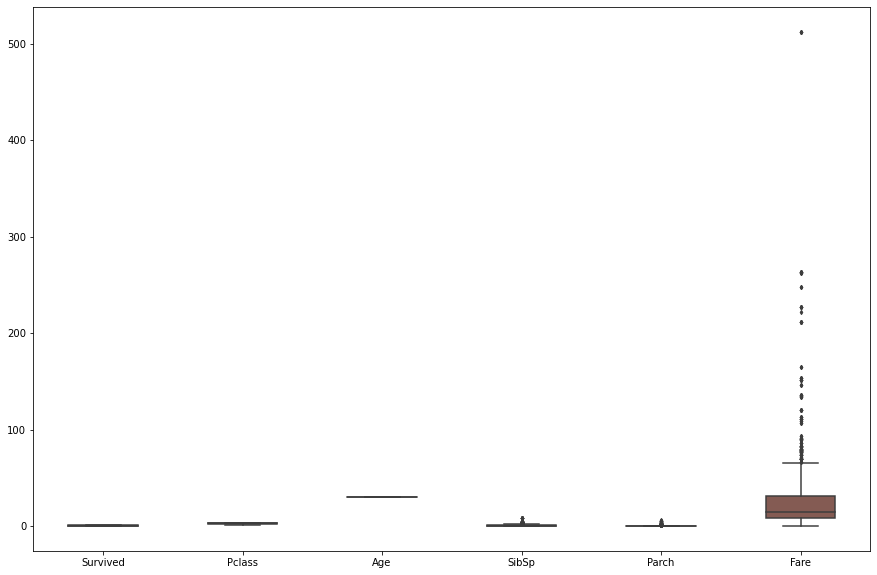

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=titanic, width= 0.5,ax=ax,  fliersize=3)

In [45]:
titanic['Pclass']=titanic['Pclass'].mean()
titanic['SibSp']=titanic['SibSp'].mean()
titanic['Parch']=titanic['Parch'].mean()
titanic['Fare']=titanic['Fare'].mean()

<IPython.core.display.Javascript object>

<AxesSubplot:>

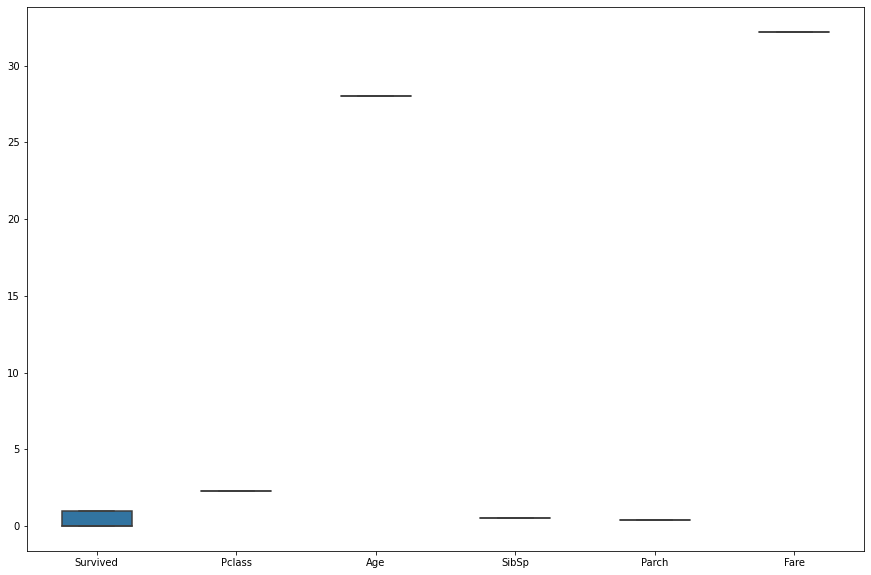

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=titanic, width= 0.5,ax=ax,  fliersize=3)

In [10]:
Sex_category=pd.get_dummies(titanic['Sex'],drop_first=True)
Sex_category

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [11]:
titanic_copy=titanic.copy()
titanic_copy.drop(['Sex'],axis=1,inplace=True)
titanic=pd.concat([titanic_copy,Sex_category],axis=1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,29.699118,1,0,7.2500,1
1,1,1,29.699118,1,0,71.2833,0
2,1,3,29.699118,0,0,7.9250,0
3,1,1,29.699118,1,0,53.1000,0
4,0,3,29.699118,0,0,8.0500,1


In [12]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,4.865925e-01,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642,8.360712e-01,1.000000,2.000000,3.000000,3.000000,3.000000
Age,891.0,29.699118,3.021503e-13,29.699118,29.699118,29.699118,29.699118,29.699118
SibSp,891.0,0.523008,1.102743e+00,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,0.381594,8.060572e-01,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,32.204208,4.969343e+01,0.000000,7.910400,14.454200,31.000000,512.329200
male,891.0,0.647587,4.779901e-01,0.000000,0.000000,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of  Age')]

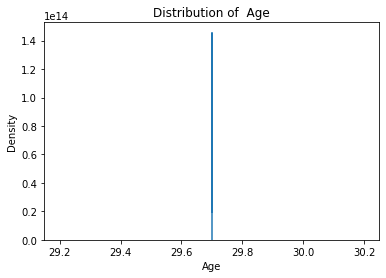

In [13]:

sns.distplot(titanic["Age"]).set(title = "Distribution of  Age")

<IPython.core.display.Javascript object>

<AxesSubplot:>

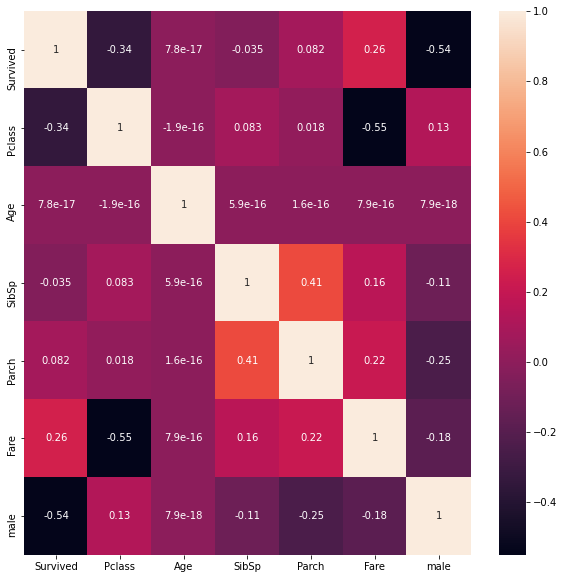

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(),annot=True)

In [15]:
X = titanic.drop(columns = 'Survived')
y = titanic['Survived']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)


In [17]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

<IPython.core.display.Javascript object>

[Text(0.5, 1.0, 'survived')]

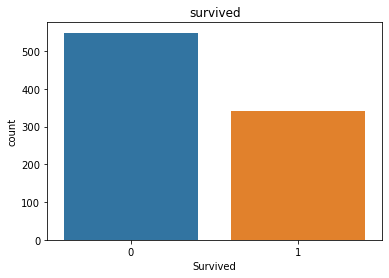

In [18]:
sns.countplot(x=titanic["Survived"]).set(title = 'survived')

In [19]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

[Text(385.1015625, 528.5, 'X[5] <= 0.5\ngini = 0.477\nsamples = 623\nvalue = [378, 245]'),
 Text(161.4375, 498.3, 'X[0] <= 2.5\ngini = 0.373\nsamples = 222\nvalue = [55, 167]'),
 Text(81.0, 468.1, 'X[4] <= 28.856\ngini = 0.133\nsamples = 126\nvalue = [9, 117]'),
 Text(63.0, 437.9, 'X[4] <= 28.231\ngini = 0.237\nsamples = 51\nvalue = [7, 44]'),
 Text(54.0, 407.70000000000005, 'X[2] <= 0.5\ngini = 0.211\nsamples = 50\nvalue = [6, 44]'),
 Text(36.0, 377.5, 'X[4] <= 13.25\ngini = 0.157\nsamples = 35\nvalue = [3, 32]'),
 Text(27.0, 347.3, 'X[3] <= 1.0\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(18.0, 317.1, 'X[4] <= 11.25\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(9.0, 286.9, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(27.0, 286.9, 'X[4] <= 12.675\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(18.0, 256.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(36.0, 256.7, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(36.0, 317.1, 'gini = 0.0\nsamples = 

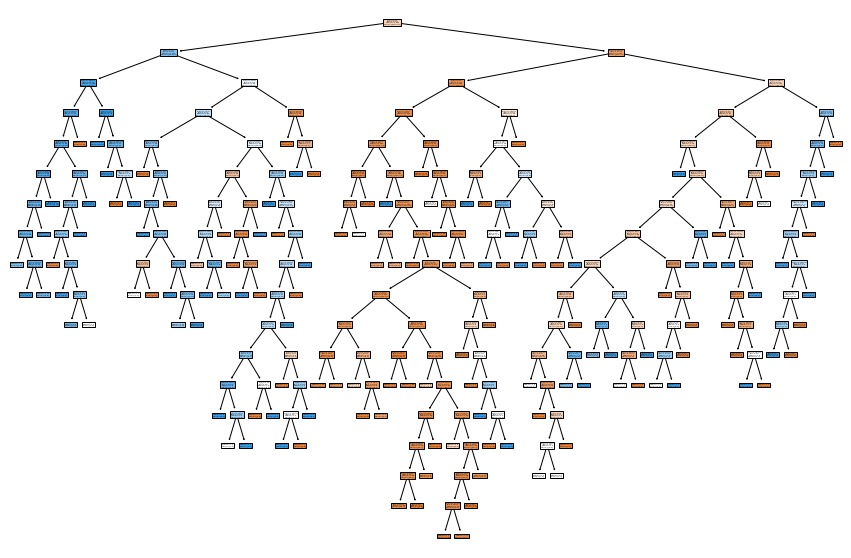

In [21]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)  


In [22]:
clf.score(x_train,y_train)

0.9197431781701445

In [23]:
clf.score(x_test,y_test)

0.7873134328358209

In [24]:
py_pred = clf.predict(x_test)

In [25]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [26]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [27]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [28]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'}


In [29]:
grid_search.best_score_

0.8169548387096774

In [30]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =24, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24, splitter='random')

In [31]:
clf.score(x_test,y_test)

0.7723880597014925

[Text(374.85763826438847, 530.6571428571428, 'X[5] <= 0.458\nentropy = 0.967\nsamples = 623\nvalue = [378, 245]'),
 Text(125.67903391572456, 504.7714285714286, 'X[0] <= 1.014\nentropy = 0.808\nsamples = 222\nvalue = [55, 167]'),
 Text(49.54902363823227, 478.8857142857143, 'X[3] <= 0.055\nentropy = 0.25\nsamples = 72\nvalue = [3, 69]'),
 Text(38.538129496402874, 453.0, 'X[2] <= 0.781\nentropy = 0.149\nsamples = 47\nvalue = [1, 46]'),
 Text(33.032682425488176, 427.11428571428576, 'X[4] <= 268.233\nentropy = 0.229\nsamples = 27\nvalue = [1, 26]'),
 Text(27.527235354573484, 401.22857142857146, 'X[4] <= 98.374\nentropy = 0.235\nsamples = 26\nvalue = [1, 25]'),
 Text(22.021788283658786, 375.34285714285716, 'X[4] <= 38.843\nentropy = 0.337\nsamples = 16\nvalue = [1, 15]'),
 Text(16.516341212744088, 349.4571428571429, 'X[4] <= 27.586\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(11.010894141829393, 323.57142857142856, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(22.02178828365

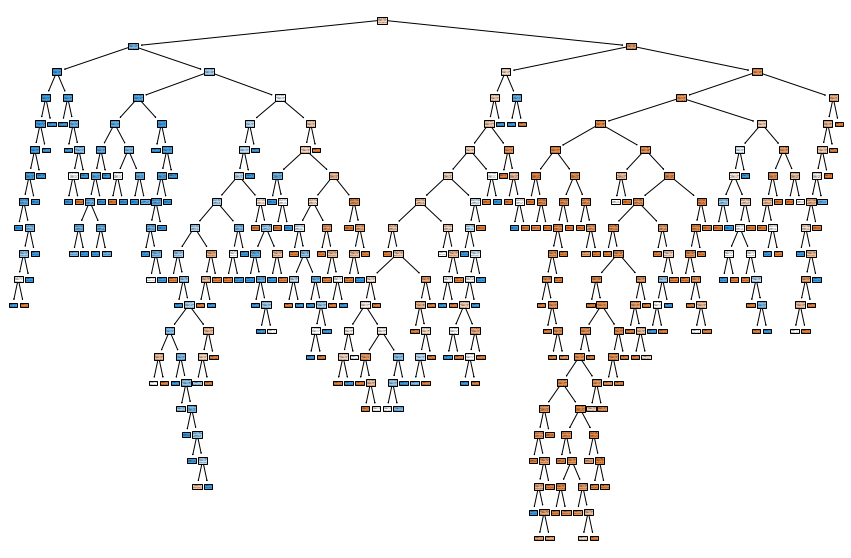

In [32]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True) 

In [33]:
print(tree.export_text(clf))

|--- feature_5 <= 0.46
|   |--- feature_0 <= 1.01
|   |   |--- feature_3 <= 0.06
|   |   |   |--- feature_2 <= 0.78
|   |   |   |   |--- feature_4 <= 268.23
|   |   |   |   |   |--- feature_4 <= 98.37
|   |   |   |   |   |   |--- feature_4 <= 38.84
|   |   |   |   |   |   |   |--- feature_4 <= 27.59
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  27.59
|   |   |   |   |   |   |   |   |--- feature_4 <= 30.95
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 29.32
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 27.84
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  27.84
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_4 >  29.32
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  30.95
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |

In [35]:
import pickle

with open('dtree.pickle', 'wb') as f:
    pickle.dump(clf,f)